# Directed multi-graph (.gml)

1. Read .gml file


In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

gml_files = glob('../output/network/*/*.gml')

# graph = nx.read_gml('../data/graph/article1.gml')

In [3]:
print(len(gml_files))
gml_files

50


['../output/network/negative/article03.gml',
 '../output/network/negative/article05.gml',
 '../output/network/negative/article06.gml',
 '../output/network/negative/article07.gml',
 '../output/network/negative/article1.gml',
 '../output/network/negative/article1001.gml',
 '../output/network/negative/article1021.gml',
 '../output/network/negative/article152.gml',
 '../output/network/negative/article2308.gml',
 '../output/network/negative/article3335.gml',
 '../output/network/negative/article4106.gml',
 '../output/network/negative/article432.gml',
 '../output/network/negative/article5164.gml',
 '../output/network/negative/article5717.gml',
 '../output/network/negative/article5813.gml',
 '../output/network/negative/article621.gml',
 '../output/network/negative/article683.gml',
 '../output/network/negative/article703.gml',
 '../output/network/negative/article774.gml',
 '../output/network/negative/article782.gml',
 '../output/network/negative/article99.gml',
 '../output/network/neutral/artic

In [4]:
def calculate_graph_inf(graph):
    info = nx.info(graph)
    print info
    # plot spring layout
    plt.figure(figsize=(11,11))
    nx.draw_spring(graph, arrows=True, with_labels=True)

In [5]:
gml_files[0]

'../output/network/negative/article03.gml'

********************************************************************************
../output/network/negative/article03.gml
Name: 
Type: MultiDiGraph
Number of nodes: 17
Number of edges: 10
Average in degree:   0.5882
Average out degree:   0.5882
********************************************************************************
../output/network/negative/article05.gml
Name: 
Type: MultiDiGraph
Number of nodes: 22
Number of edges: 22
Average in degree:   1.0000
Average out degree:   1.0000
********************************************************************************
../output/network/negative/article06.gml
Name: 
Type: MultiDiGraph
Number of nodes: 127
Number of edges: 121
Average in degree:   0.9528
Average out degree:   0.9528
********************************************************************************
../output/network/negative/article07.gml
Name: 
Type: MultiDiGraph
Number of nodes: 57
Number of edges: 53
Average in degree:   0.9298
Average out degree:   0.9298
******************

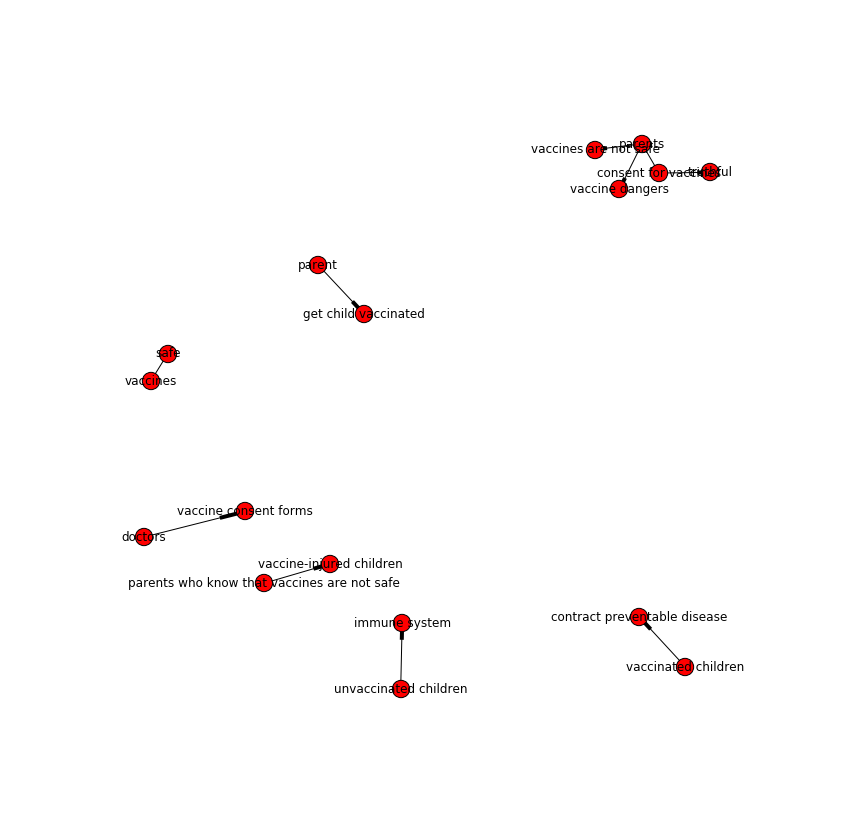

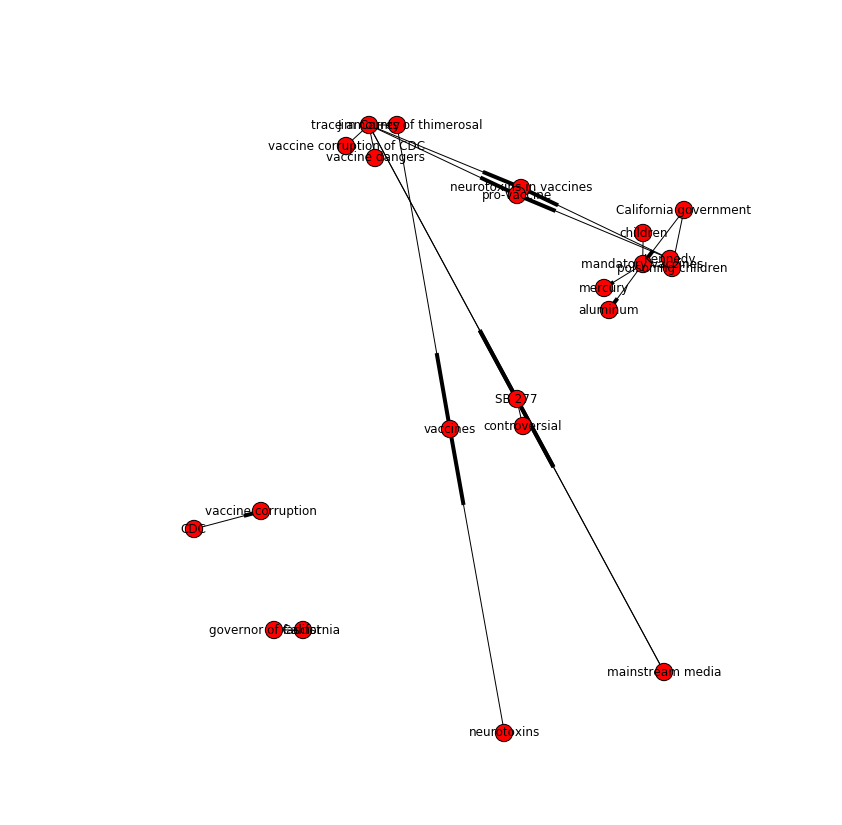

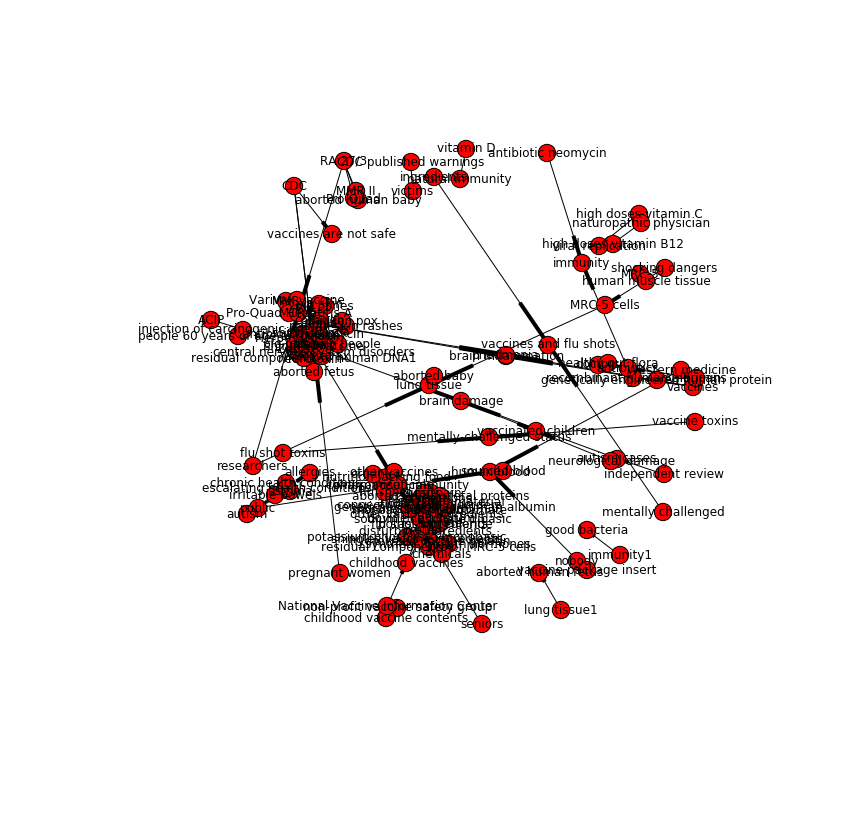

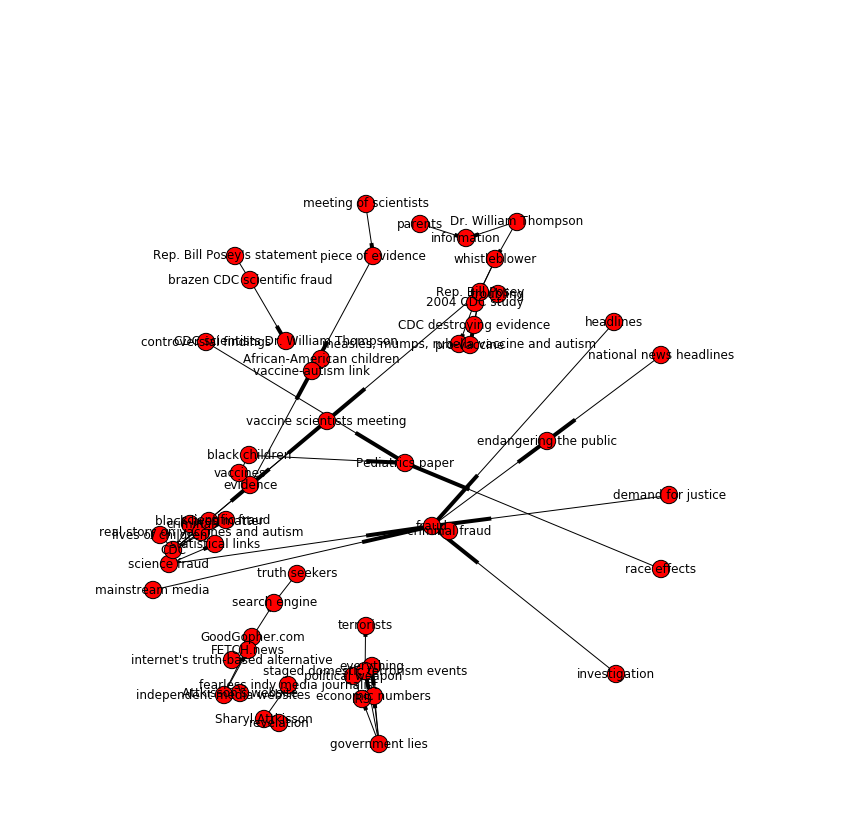

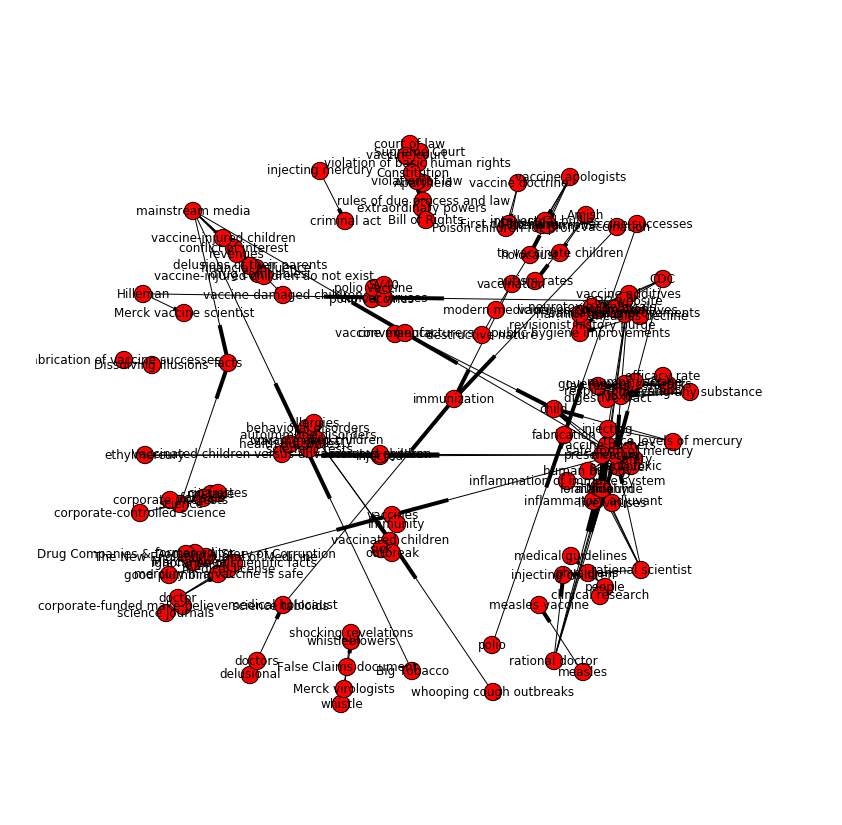

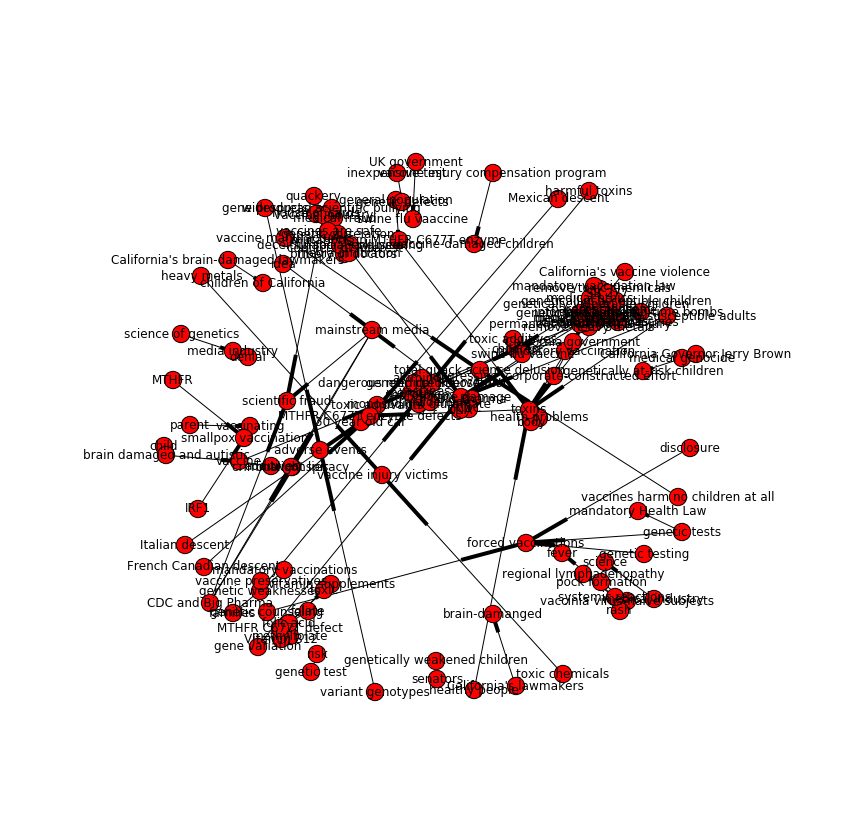

In [6]:
for graph_num, gml_graph in enumerate(gml_files):
    graph = nx.read_gml(gml_graph)
    print('*' * 80)
    print(gml_graph)
    calculate_graph_inf(graph)
    if graph_num == 5:
        break

In [7]:
nx.average_degree_connectivity(graph)

{1: 1.3563218390804597,
 2: 1.6521739130434783,
 3: 1.9583333333333333,
 4: 1.375,
 5: 1.55,
 8: 0.6875,
 9: 1.0,
 10: 1.8,
 11: 1.1818181818181819,
 21: 1.7142857142857142}

In [9]:
a = nx.betweenness_centrality(graph)
dfIn=pd.DataFrame.from_dict(a,orient='index')
dfIn.columns = ['betweenness centrality']
dfIn = dfIn.sort_values(by=['betweenness centrality'])
dfIn

,betweenness centrality
senators,0.000000
deceitful social engineering,0.000000
gene products,0.000000
Italian descent,0.000000
families,0.000000
healthy people,0.000000
quackery,0.000000
genetic tests,0.000000
MTHFR,0.000000
heavy metals,0.000000


In [8]:
# average degree, average path, diameter, density

nx.density(graph)

# degree histogram: returns a list of frequencies of degrees
nx.degree_histogram(graph)


[0, 87, 23, 8, 6, 4, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [1]:
### Centrality ###

# degree centrality
nx.degree_centrality(graph).values()

# betweenness centrality
a = nx.betweenness_centrality(graph)
dfIn=pd.DataFrame.from_dict(a,orient='index')
dfIn.columns = ['betweenness centrality']
dfIn = dfIn.sort_values(by=['betweenness centrality'])
dfIn

# closeness centrality
nx.closeness_centrality(graph).values()

# current-flow betweenness centrality (graph must be connected; run for largest component)
# nx.current_flow_betweenness_centrality(graph)

# eigenvector centrality

NameError: name 'nx' is not defined

In [ ]:
### Assortativity ###

# degree assortativity coefficient, average neighbor degree, average degree connectivity (k nearest neighbors)
nx.degree_assortativity_coefficient(graph)


In [ ]:
### Components and connectivity ###

#nx.edge_connectivity(graph)
#nx.node_connectivity(graph)

#avg_node_con = nx.average_node_connectivity(graph)
nx.average_node_connectivity(graph)



### Other things###
# clustering coefficient (cannot be multigraph)
# nx.average_clustering(graph)


In [ ]:
print info
print "Density ="
print "Degree centrality ="
print "Closeness centrality ="
print "Betweenness centrality ="
print "Degree assortativity coefficient ="
print "Degree pearson correlation coefficient ="
print "Average node connectivity ="